<a href="https://colab.research.google.com/github/anuragsgupta/Tomato-Plant-Disease-Detection/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset from Kaggle

In [ ]:
%%bash
#install kaggle
pip install -q kaggle

#create a Kaggle folder #copy kaggle.json to copied folder
echo '{"username":"disha1503","key":"3d1810121b6c88f023679868aa91845b"}' > ~/.kaggle/kaggle.json

#permission for json to act
chmod 600 ~/.kaggle/kaggle.json
kaggle datasets download -d shylesh101/tomato-leaf-disease
unzip tomato-leaf-disease.zip
pip install tensorflow


## Importing essential Libraries

In [ ]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization , Add, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

## loading dataset directory

In [ ]:
train_data_dir = '/content/tomato_dataset/train'
test_data_dir = '/content/tomato_dataset/test'
val_data_dir = '/content/tomato_dataset/valid'

## Image Augmentation

In [ ]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# train_datagen = ImageDataGenerator(rescale=1/255.0,# Normalizing images
#                                   shear_range=0.2,
#                                   rotation_range=10,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   validation_split=0.2)# specifying the validation split inside the function

# Drop out	0.01
# Optimizer	Adam
# Shearing	−0.3 to +.3
# Horizontal flipping	True
# Rotating	−10 to +10
# Zooming	0.5 to 1.5
# Batch Size	32
# Validation split	0.2
# test_datagen = ImageDataGenerator(rescale=1/255.0,# Normalizing images
#                                 shear_range=0.2,
#                                 zoom_range=0.2,
#                                 horizontal_flip=True)

In [ ]:
train_gen = train_datagen.flow_from_directory(
                               train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')
# seed=2020 # to make the result reproducible

Found 18345 images belonging to 10 classes.


In [ ]:
val_gen = train_datagen.flow_from_directory(
                                val_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 0 images belonging to 10 classes.


## View Augmented Data

In [ ]:
t_img, label = train_gen.next()

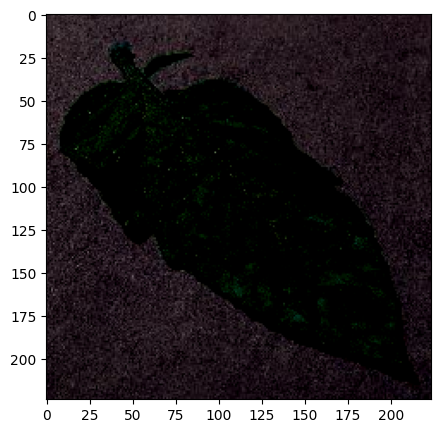

In [ ]:
def plotImage(t_img, label):

  for im, l in zip(t_img, label) :
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

plotImage(t_img[:1],label[:1])

In [ ]:
# test_gen = test_datagen.flow_from_directory(
#         test_data_dir,
#         target_size=(224, 224),
#         batch_size=32,
#         class_mode='categorical',
#         shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 50 images belonging to 10 classes.


## Custom Sequential CNN Model

In [ ]:
# Define early stopping callback
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)

opt = keras.optimizers.Adam(learning_rate=0.0001)


In [ ]:
cnn1 = models.Sequential()

cnn1.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn1.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn1.add(layers.Conv2D(64, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(64, (3,3), padding ='same', activation='relu')),
cnn1.add(layers. MaxPooling2D((2, 2))),

cnn1.add(layers.Conv2D(128, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(128, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers. Conv2D(256, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(256, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3, 3), padding ='same', activation='relu')),
cnn1.add(layers.Conv2D(512, (3,3), padding ='same', activation='relu')),
cnn1.add(layers.MaxPooling2D((2, 2))),

cnn1.add(layers.Flatten()),

cnn1.add(layers.Dense(64,activation='relu')),
cnn1.add(Dropout(0.24)),
#output layer
cnn1.add(layers.Dense(10,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 55, 55, 128)       7

In [ ]:
cnn1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = cnn1.fit(x = train_gen,
                    callbacks = [es],
                    steps_per_epoch = 14678//32,
                    epochs = 20,
                    validation_steps = 915//32,
                    validation_data = val_gen)

Epoch 1/20
139/458 [========>.....................] - ETA: 2:15 - loss: 2.3025 - accuracy: 0.1045

In [ ]:
scores1 = cnn1.evaluate(test_gen)

In [ ]:
#don't forget to save your model for later
cnn1.save('cnn1.h5')

## VGG16 Model

In [ ]:
model1 = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
model1.trainable=False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
cnn2=keras.models.Sequential()
cnn2.add(model1)
cnn2.add(Flatten())
cnn2.add(layers.Dense(64,activation='relu'))
cnn2.add(layers.Dense(10,activation='softmax'))
cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 16321034 (62.26 MB)
Trainable params: 1606346 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training vgg16 model
history = cnn2.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

NameError: name 'es' is not defined

In [ ]:
scores2 = cnn2.evaluate(test_gen)

In [ ]:
cnn2.save('cnn2.h5')

## **VGG19** Model

In [ ]:
model2 = VGG19(include_top=False, weights='imagenet',input_shape=(224,224,3))
model2.trainable=False

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
cnn3=keras.models.Sequential()
cnn3.add(model1)
cnn3.add(Flatten())
cnn3.add(layers.Dense(64,activation='relu'))
cnn3.add(layers.Dense(10,activation='softmax'))
cnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 16321034 (62.26 MB)
Trainable params: 1606346 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)

NameError: name 'keras' is not defined

In [ ]:
cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = cnn3.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

In [ ]:

history_20_epochs = cnn3.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

NameError: name 'cnn3' is not defined

In [ ]:
scores3 = cnn3.evaluate(test_gen)

2/2 [==============================] - 5s 5s/step - loss: 0.4392 - accuracy: 0.9000


In [ ]:
cnn3.save('cnn3.h5')
# Complete at 20 epochs on relu

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Vgg19 testing accuracy on tanh at 20 epochs


In [ ]:
# created by anurag testing accuracy on tanh at 20 epochs
cnn3=keras.models.Sequential()
cnn3.add(model1)
cnn3.add(Flatten())
cnn3.add(layers.Dense(64,activation='tanh'))
cnn3.add(layers.Dense(10,activation='softmax'))
cnn3.summary()

cnn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_20_epochs_tanh = cnn3.fit(x = train_gen,
                    callbacks = [es],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 16321034 (62.26 MB)
Trainable params: 1606346 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/20
101/101 [==============================] - 199s 2s/step - loss: 2.5034 - accuracy: 0.3622 - val_loss: 1.8634 - val_accuracy: 0.51

KeyboardInterrupt: 

## Resnet50 Model

In [ ]:
model3 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10)
model3.trainable=False

94765736/94765736 [==============================] - 1s 0us/step


### resnet50 model 1

In [ ]:

# Load pre-trained ResNet50 model without top layers
model3 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10)

# Freeze base model layers
for layer in model3.layers:
    layer.trainable = False

pt = Input(shape=(224,224,3))
func = tf.cast(pt,tf.float32)
x = preprocess_input(func) #This function used to zero-center each color channel wrt Imagenet dataset

# Add custom classification layers on top of ResNet50

# model_resnet = model3(x,training=False)
# model_resnet = GlobalAveragePooling2D()(model_resnet)
# model_resnet = Dense(128,activation='relu')(model_resnet)
# model_resnet = Dense(64,activation='relu')(model_resnet)
# model_resnet = Dense(10,activation='softmax')(model_resnet)

model_resnet = model3(x,training=False)
model_resnet = GlobalAveragePooling2D()(model_resnet)
model_resnet =  BatchNormalization()(model_resnet)
model_resnet =  Dropout(0.5)(model_resnet)
model_resnet = Dense(512,activation='relu')(model_resnet)
model_resnet =  BatchNormalization()(model_resnet)
model_resnet =  Dropout(0.5)(model_resnet)
model_resnet = Dense(10,activation='softmax')(model_resnet)


cnn4 = Model(inputs=pt,outputs=model_resnet)
cnn4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_1 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0   

In [ ]:
cnn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define learning rate reduction callback
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.0001)

In [ ]:
# Train the model
cnn4_history_at_20_epochs_resnet = cnn4.fit(x = train_gen,
                    callbacks = [es,lr],
                    # steps_per_epoch = 12845//32,
                    epochs = 20,
                    # validation_steps = 1372//32,
                    validation_data = val_gen)

history = model3.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[es, lr])

Epoch 1/20
459/459 [==============================] - 3347s 7s/step - loss: 2.1022 - accuracy: 0.3600 - val_loss: 1.7890 - val_accuracy: 0.3694 - lr: 0.0010
Epoch 2/20
459/459 [==============================] - 3446s 8s/step - loss: 1.6394 - accuracy: 0.4458 - val_loss: 1.2889 - val_accuracy: 0.5519 - lr: 0.0010
Epoch 3/20
459/459 [==============================] - 3338s 7s/step - loss: 1.5302 - accuracy: 0.4743 - val_loss: 1.2095 - val_accuracy: 0.5661 - lr: 0.0010
Epoch 4/20
459/459 [==============================] - 3356s 7s/step - loss: 1.4426 - accuracy: 0.4999 - val_loss: 1.1885 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 5/20
459/459 [==============================] - 3328s 7s/step - loss: 1.4093 - accuracy: 0.5076 - val_loss: 1.1856 - val_accuracy: 0.5770 - lr: 0.0010
Epoch 6/20
459/459 [==============================] - 3289s 7s/step - loss: 1.4045 - accuracy: 0.5089 - val_loss: 1.1661 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 7/20
362/459 [======================>.......] - ETA:

In [ ]:
scores4 = cnn4.evaluate(test_gen)

In [ ]:
cnn4.save('cnn4.h5')

### Resnet50 Model changing parmeters to gain accuracy

 resnet50 by anurag gupta


In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
lr=ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.0001)


es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 20,
                   verbose = 1,
                   restore_best_weights = True)



# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators
train_data_dir = '/content/tomato_dataset/train'
test_data_dir = '/content/tomato_dataset/test'
val_data_dir = '/content/tomato_dataset/valid'

train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_gen = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')



Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:

# Train the model
history = model.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=[es, lr])


resnet50 with dropout layers by anurag



Changes
GlobalAveragePooling2D Layer: Introduced a GlobalAveragePooling2D layer to reduce spatial dimensions and extract global features from the output of the base ResNet50 model, which helps in capturing more abstract features.

BatchNormalization Layers: Included BatchNormalization layers before activation functions to speed up training and improve stability by normalizing inputs to each layer, facilitating faster convergence and better generalization.

Dropout Layers: Integrated Dropout layers for regularization to prevent overfitting by randomly dropping a fraction of units during training, thereby reducing reliance on specific features and improving model robustness.

ModelCheckpoint Callback: Incorporated a ModelCheckpoint callback to save the model's weights when validation accuracy improves, ensuring that the best-performing model is retained for future use.

CSVLogger Callback: Added a CSVLogger callback to log training history (loss and metrics) to a CSV file, enabling comprehensive analysis and visualization of model performance over epochs.

These improvements collectively

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add GlobalAveragePooling2D layer to reduce spatial dimensions
x = GlobalAveragePooling2D()(base_model.output)

# Add BatchNormalization before activation to speed up training and improve stability
x = BatchNormalization()(x)

# Add Dropout layer for regularization to prevent overfitting
x = Dropout(0.5)(x)

# Add Dense layer with ReLU activation to capture complex patterns
x = Dense(512, activation='relu')(x)

# Add BatchNormalization before activation
x = BatchNormalization()(x)

# Add Dropout layer for further regularization
x = Dropout(0.5)(x)

# Add output layer with softmax activation for multi-class classification
output = Dense(10, activation='softmax')(x)

# Define the model architecture
model_with_dropout = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
model_with_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators with data augmentation for training and validation
train_data_dir = '/content/tomato_dataset/train'
val_data_dir = '/content/tomato_dataset/valid'
test_data_dir = '/content/tomato_dataset/test'

# Data augmentation for training set to increase dataset diversity and prevent overfitting
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator with preprocessing but no augmentation
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

# Flow training and validation data in batches using generators
train_gen = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_gen = val_datagen.flow_from_directory(test_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_data_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')




94765736/94765736 [==============================] - 1s 0us/step
Found 18345 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
model_with_dropout.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

fitting resnet50 with dropout layer

In [ ]:
# Define callbacks to monitor training and save the best model
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
checkpoint = ModelCheckpoint('model_with_dropout.h5', save_best_only=True)
csv_logger = CSVLogger('history_with_dropout.csv')

# Define callbacks list
callbacks = [es, lr, checkpoint, csv_logger]

# Train the model with callbacks
history_with_dropout = model_with_dropout.fit(train_gen, epochs=20, validation_data=val_gen, callbacks=callbacks)


Epoch 1/20
574/574 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.7793

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


574/574 [==============================] - 297s 497ms/step - loss: 0.6889 - accuracy: 0.7793 - val_loss: 0.2716 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 2/20
368/574 [==================>...........] - ETA: 1:30 - loss: 0.4210 - accuracy: 0.8605

In [ ]:
# Saving to trained to drive
model_with_dropout.save('./drive/MyDrive/cnnModel/cnnResnet50_with_dropout_improved.h5')
model_with_dropout.save('./cnnResnet50_with_dropout_improved.h5')

Loading Trained Model from Drive

In [ ]:
#  Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
load_model = tf.keras.models.load_model("/content/drive/MyDrive/cnnModel/cnnResnet50_with_dropout.h5")

In [ ]:
# Unmounting drive
drive.flush_and_unmount()

In [ ]:
scores4_with_dropout = model_with_dropout.evaluate(train_gen)

574/574 [==============================] - 63s 109ms/step - loss: 0.0054 - accuracy: 0.9995


In [ ]:
score_test_train = load_model.evaluate(test_gen)


2/2 [==============================] - 12s 3s/step - loss: 0.0996 - accuracy: 0.9800


In [ ]:
load_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
load_model = tf.keras.models.load_model("/content/drive/MyDrive/cnnModel/cnnResnet50_with_dropout.h5")
load_model.history['loss']

TypeError: 'History' object is not subscriptable

In [ ]:
import matplotlib.pyplot as plt
history_with_dropout = load_model
# Plot training and validation loss
plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_gen)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


TypeError: 'NoneType' object is not subscriptable

### Task VGG16/19:: Run model at 20 epoch and save it


In [ ]:
plt.plot(load_model.history['loss'], label='Training loss')
plt.plot(load_model.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(load_model.history['accuracy'], label='Training accuracy')
plt.plot(load_model.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

<ipython-input-46-c676ae2200e0>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [ ]:
# # Predict classes
predictions = model_with_dropout.predict(test_gen, steps=test_steps_per_epoch)

2/2 [==============================] - 1s 125ms/step


In [ ]:
predictions[1]

array([3.1002236e-07, 3.4942693e-01, 3.5049557e-04, 8.1129900e-07,
       6.5020776e-01, 9.6236414e-09, 1.8820689e-09, 1.2428393e-05,
       1.0934966e-06, 2.3169457e-07], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions,axis=1)

In [ ]:
# # Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

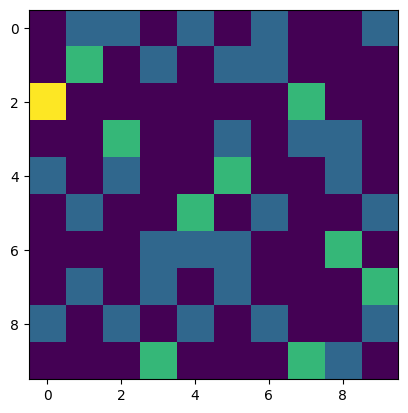

In [ ]:
# Import the confusion_matrix function from scikit-learn
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_gen.classes, predicted_classes)

# Print the confusion matrix
# print(conf_matrix)
plt.imshow(conf_matrix)

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.00      0.00      0.00         5
                        Tomato___Early_blight       0.40      0.40      0.40         5
                         Tomato___Late_blight       0.00      0.00      0.00         5
                           Tomato___Leaf_Mold       0.00      0.00      0.00         5
                  Tomato___Septoria_leaf_spot       0.00      0.00      0.00         5
Tomato___Spider_mites Two-spotted_spider_mite       0.00      0.00      0.00         5
                         Tomato___Target_Spot       0.00      0.00      0.00         5
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00         5
                 Tomato___Tomato_mosaic_virus       0.00      0.00      0.00         5
                             Tomato___healthy       0.00      0.00      0.00         5

                                     accu